In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">
<button>Toggle Code</button></a>''')

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set random seed
np.random.seed(1000)

In [3]:
"""
    Create dataset class
"""
class Dataset:
    """
        Class that creates linear/non-linear datasets
    """
    @classmethod
    def linear(cls, features=2, samples=50):
        """
            Creates linearly separable data
                features: number of features for data
                samples: number of samples
        """
        # create random weight vector based on number of features
        weights = cls._uniform_rand(features)
        
        # now create a bunch of random examples
        examples = cls._uniform_rand(samples,features)
        
        # now do the inner product of the weights with the examples
        decision = np.dot(examples,weights)
        
        # choose a random threshold
        threshold = (decision.max() + decision.min())/2
        class_assignment = 2*((decision > threshold)-0.5)
        
        # return assignment and examples
        return class_assignment,examples
        
    @classmethod
    def nonlinear(cls, features=2, samples=50):
        """
            Creates non-linearly separable data
                features: number of features for data
                samples: number of samples
        """
        # create random weight vector based on number of features
        weights = cls._uniform_rand(features)
        
        # now create a bunch of random examples
        examples = cls._uniform_rand(samples,features)
        
        # square all examples
        examples_squared = examples**2
                            
        # now do the inner product of the weights with the examples
        decision = np.dot(examples_squared,weights)
        
        # set class threshold that balances dataset
        for threshold in np.linspace(decision.min(),decision.max(),100):
            class_assignment = decision > threshold
            # good threshold when at least half of data is one class
            if np.count_nonzero(class_assignment) <= samples/2:
                class_assignment = 2*((decision > threshold)-0.5)
                break
        
        # return assignment and examples
        return class_assignment,examples
    
    @staticmethod
    def _uniform_rand(*args,**kwargs):
        """
            Generates a uniform random variable from -1 to 1
        """
        return (np.random.rand(*args,**kwargs)-0.5)*2
    
class GroupedDataset:
    """
        Class that creates dataset of gaussian blobs
    """
    @classmethod
    def blobs(cls, features=2, samples=50, num_blobs=2,
             mean=(-2,2), sd=(1,2)):
        # create gaussian blobs
        blobs = list()
        class_assignment = list()
        for n in range(num_blobs):
            blobs.append(sd[n]*np.random.randn(samples,features)+mean[n])
            class_assignment.append(n*np.ones((samples,)))
            
        # convert to full numpy
        blobs = np.vstack(blobs)
        class_assignment = np.hstack(class_assignment)
        
        # return assignment
        return class_assignment,blobs

# Problem 1

#### Methods

In this problem, we examine the LDA and PCA methods on various datasets. We refer to the notes on lecture 11 and 12 on the procedure for each of these algorithms.

The two methods were tested on 3 datasets. The 1st is a dataset that is known to be linearly separable. This was accomplised by generating a random weight vector, applying it to randomly generated data, and creating labels by arbitrarily setting the dection boundary to approximately spit the data in half.

The 2nd dataset was generated similarly to the 1st, with exception of squaring the data, before applying the weight vectors. This forces the data to be non-linearly separable.

The 3rd dataset are two 2d uniform gaussian distributions set to different means and standard deviations. 

#### Results

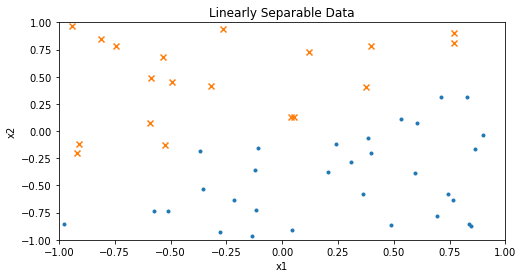

In [4]:
# create data
data = Dataset.linear()

# get each class
class1 = data[0] == 1
class2 = data[0] == -1

# visualize data
plt.figure(figsize=(8,4))
plt.scatter(data[1][class1,0],data[1][class1,1],marker='.')
plt.scatter(data[1][class2,0],data[1][class2,1],marker='x')
plt.xlim(-1,1); plt.ylim(-1,1)
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('Linearly Separable Data');

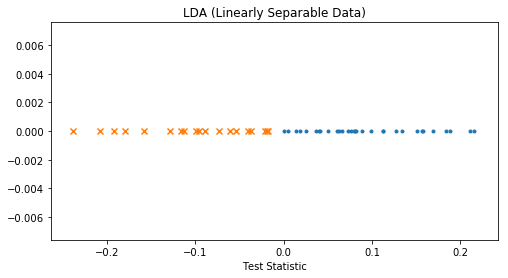

In [5]:
"""
LDA
"""
# calculate means of each class
u1 = np.mean(data[1][class1,:],axis=0)
u2 = np.mean(data[1][class2,:],axis=0)

# calculate scatter matrix between 2 classes
S1 = np.matmul(
    (data[1][class1,:] - u1).T,
    (data[1][class1,:] - u1))
S2 = np.matmul(
    (data[1][class2,:] - u2).T,
    (data[1][class2,:] - u2))
Sw = S1 + S2

# Do LDA on data
w = np.matmul(np.linalg.inv(Sw),(u1-u2))

# transform data with LDA
plt.figure(figsize=(8,4))
t = np.dot(data[1],w)
plt.scatter(t[class1],np.zeros((t[class1].shape[0],1)),marker='.')
plt.scatter(t[class2],np.zeros((t[class2].shape[0],1)),marker='x')
plt.title('LDA (Linearly Separable Data)'); plt.xlabel('Test Statistic');

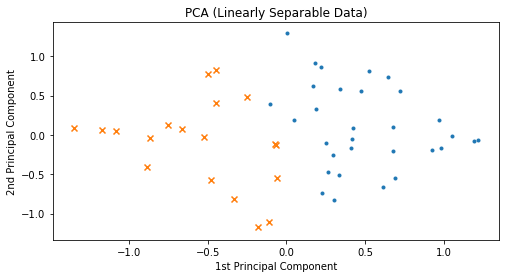

In [6]:
"""
PCA
"""
# get covariance matrix of data
sigma = np.cov(data[1].T)

# do eigen decomposition on covariance matrix
[e_vals, e_vecs] = np.linalg.eig(sigma)

# Project onto principal components
t1 = np.dot(data[1],e_vecs[:,1])
t2 = np.dot(data[1],e_vecs[:,0])

# Plot PCA
plt.figure(figsize=(8,4))
plt.scatter(t1[class1],t2[class1],marker='.')
plt.scatter(t1[class2],t2[class2],marker='x')
plt.xlabel('1st Principal Component'); plt.ylabel('2nd Principal Component');
plt.title('PCA (Linearly Separable Data)');

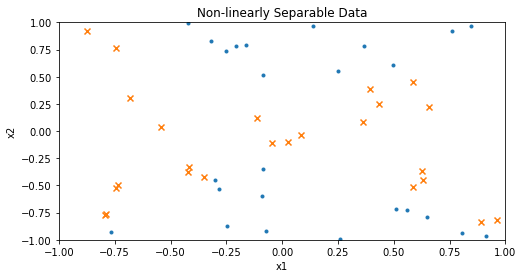

In [7]:
# create data
data = Dataset.nonlinear()

# get each class
class1 = data[0] == 1
class2 = data[0] == -1

# visualize data
plt.figure(figsize=(8,4))
plt.scatter(data[1][class1,0],data[1][class1,1],marker='.')
plt.scatter(data[1][class2,0],data[1][class2,1],marker='x')
plt.xlim(-1,1); plt.ylim(-1,1)
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('Non-linearly Separable Data');

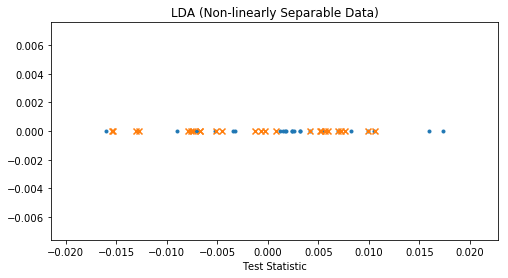

In [8]:
"""
LDA
"""
# calculate means of each class
u1 = np.mean(data[1][class1,:],axis=0)
u2 = np.mean(data[1][class2,:],axis=0)

# calculate scatter matrix between 2 classes
S1 = np.matmul(
    (data[1][class1,:] - u1).T,
    (data[1][class1,:] - u1))
S2 = np.matmul(
    (data[1][class2,:] - u2).T,
    (data[1][class2,:] - u2))
Sw = S1 + S2

# Do LDA on data
w = np.matmul(np.linalg.inv(Sw),(u1-u2))

# transform data with LDA
plt.figure(figsize=(8,4))
t = np.dot(data[1],w)
plt.scatter(t[class1],np.zeros((t[class1].shape[0],1)),marker='.')
plt.scatter(t[class2],np.zeros((t[class2].shape[0],1)),marker='x')
plt.title('LDA (Non-linearly Separable Data)'); plt.xlabel('Test Statistic');

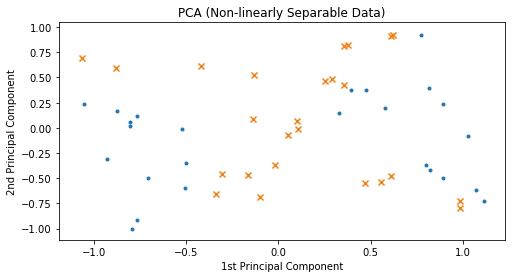

In [9]:
"""
PCA
"""
# get covariance matrix of data
sigma = np.cov(data[1].T)

# do eigen decomposition on covariance matrix
[e_vals, e_vecs] = np.linalg.eig(sigma)

# Project onto principal components
t1 = np.dot(data[1],e_vecs[:,1])
t2 = np.dot(data[1],e_vecs[:,0])

# Plot PCA
plt.figure(figsize=(8,4))
plt.scatter(t1[class1],t2[class1],marker='.')
plt.scatter(t1[class2],t2[class2],marker='x')
plt.xlabel('1st Principal Component'); plt.ylabel('2nd Principal Component');
plt.title('PCA (Non-linearly Separable Data)');

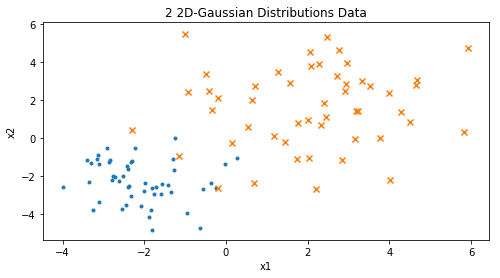

In [10]:
# create data
data = GroupedDataset.blobs()

# get each class
class1 = data[0] == 0
class2 = data[0] == 1

# visualize data
plt.figure(figsize=(8,4))
plt.scatter(data[1][class1,0],data[1][class1,1],marker='.')
plt.scatter(data[1][class2,0],data[1][class2,1],marker='x')
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('2 2D-Gaussian Distributions Data');

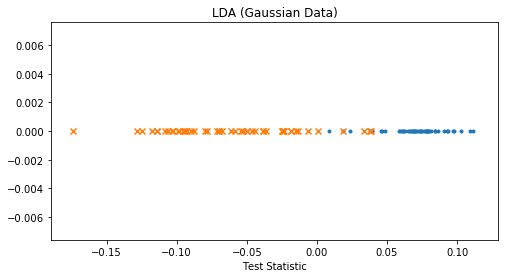

In [11]:
"""
LDA
"""
# calculate means of each class
u1 = np.mean(data[1][class1,:],axis=0)
u2 = np.mean(data[1][class2,:],axis=0)

# calculate scatter matrix between 2 classes
S1 = np.matmul(
    (data[1][class1,:] - u1).T,
    (data[1][class1,:] - u1))
S2 = np.matmul(
    (data[1][class2,:] - u2).T,
    (data[1][class2,:] - u2))
Sw = S1 + S2

# Do LDA on data
w = np.matmul(np.linalg.inv(Sw),(u1-u2))

# transform data with LDA
plt.figure(figsize=(8,4))
t = np.dot(data[1],w)
plt.scatter(t[class1],np.zeros((t[class1].shape[0],1)),marker='.')
plt.scatter(t[class2],np.zeros((t[class2].shape[0],1)),marker='x')
plt.title('LDA (Gaussian Data)'); plt.xlabel('Test Statistic');

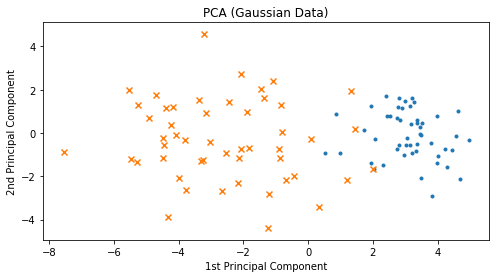

In [12]:
"""
PCA
"""
# get covariance matrix of data
sigma = np.cov(data[1].T)

# do eigen decomposition on covariance matrix
[e_vals, e_vecs] = np.linalg.eig(sigma)

# Project onto principal components
t1 = np.dot(data[1],e_vecs[:,1])
t2 = np.dot(data[1],e_vecs[:,0])

# Plot PCA
plt.figure(figsize=(8,4))
plt.scatter(t1[class1],t2[class1],marker='.')
plt.scatter(t1[class2],t2[class2],marker='x')
plt.xlabel('1st Principal Component'); plt.ylabel('2nd Principal Component');
plt.title('PCA (Gaussian Data)');

#### Discussion

For both methods, we can see that they are able to cleanly separate linearly separable data well. Both are linear methods and so this would be expected. Counter to this, they both fail at separating non-linearly separable data.

The generated gaussian distribution dataset shows the difference between the LDA and PCA methods. We see that the LDA method can separate the two groups more cleanly than the PCA method. This is due to the fact that the LDA projects the data to a subspace that maximizes the separation between the two classes, while PCA merely finds the directions of maximal variance. Thus LDA can provide cleaner separations of classes over PCA. However, we should note that the LDA method requires class labeling, while PCA does not.